![lop](../../images/logo_diive1_128px.png)

<span style='font-size:28px; display:block;'>
<b>
    Calculate time since last occurrence
</b>
    (precipitation example)
</span>

---
**Notebook version**: `1` (25 Apr 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- In this example the number of records since last recorded precipitation is counted
- This helps in identifying dry time periods
- The name of the precipitation variable is `PREC_TOT_T1_25+20_1`, recorded in `mm` precipitation per half hour

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from diive.configs.exampledata import load_exampledata_parquet
from diive.pkgs.createvar.timesince import TimeSince
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.core.plotting.timeseries import TimeSeries

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.75.0


</br>

# **Docstring**

In [2]:
# help(TimeSince)

</br>

</br>

# **Load example data**
- Half-hourly precipitation in `mm`

In [3]:
df = load_exampledata_parquet()
series = df['PREC_TOT_T1_25+20_1'].copy()
series = series.loc[series.index.year == 2022].copy()
series = series.loc[series.index.month == 7].copy()
series

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.048 seconds). Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2022-07-01 00:15:00    0.0
2022-07-01 00:45:00    0.0
2022-07-01 01:15:00    0.0
2022-07-01 01:45:00    1.9
2022-07-01 02:15:00    6.4
                      ... 
2022-07-31 21:45:00    0.0
2022-07-31 22:15:00    0.0
2022-07-31 22:45:00    0.0
2022-07-31 23:15:00    0.0
2022-07-31 23:45:00    0.0
Freq: 30min, Name: PREC_TOT_T1_25+20_1, Length: 1488, dtype: float64

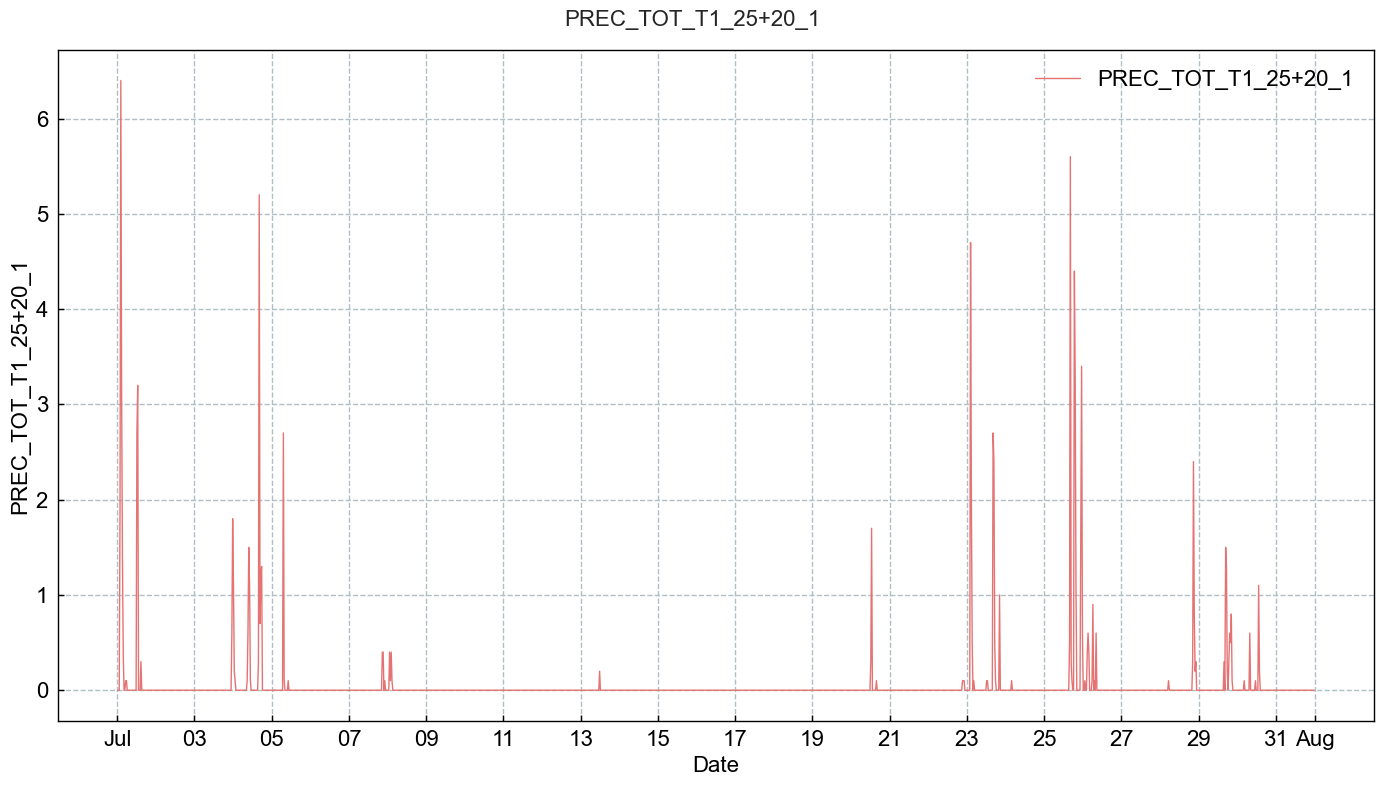

In [4]:
TimeSeries(series).plot()

</br>

</br>

# **Calculate time since last precipitation**
- `lower_lim` is set to a very low number to include records with very little precipitation
- `upper_lim` is set to `None` because all precipitation above `lower_lim` should be included
- `include_lim` is set to `True` to make `lower_lim` and `upper_lim` inclusive, in this example this does not have any effect for `upper_lim` because it is `None`

In [5]:
ts = TimeSince(series, upper_lim=None, lower_lim=0.00001, include_lim=True)
ts.calc()

## Results

The full results comprise the following output variables:
- `PREC_TOT_T1_25+20_1`: original measured precipitation (mm)
- `UPPER_LIMIT`: upper limit from settings
- `LOWER_LIMIT`: lower limit from settings
- `FLAG_IS_OUTSIDE_RANGE`: shows measured is outside specified limits, used to build cumulative sums in `TIMESINCE_PREC_TOT_T1_25+20_1`
- `TIMESINCE_PREC_TOT_T1_25+20_1`: cumulative sums of number of records since last precipitation

In [6]:
ts_full_results = ts.get_full_results()
ts_full_results

,PREC_TOT_T1_25+20_1,UPPER_LIMIT,LOWER_LIMIT,FLAG_IS_OUTSIDE_RANGE,TIMESINCE_PREC_TOT_T1_25+20_1
TIMESTAMP_MIDDLE,,,,,
2022-07-01 00:15:00,0.0,6.4,0.00001,1,1
2022-07-01 00:45:00,0.0,6.4,0.00001,1,2
2022-07-01 01:15:00,0.0,6.4,0.00001,1,3
2022-07-01 01:45:00,1.9,6.4,0.00001,0,0
2022-07-01 02:15:00,6.4,6.4,0.00001,0,0
...,...,...,...,...,...
2022-07-31 21:45:00,0.0,6.4,0.00001,1,64
2022-07-31 22:15:00,0.0,6.4,0.00001,1,65
2022-07-31 22:45:00,0.0,6.4,0.00001,1,66


It is also possible to get the `TIMESINCE_` variable directly, without full results:

In [7]:
ts_series = ts.get_timesince()
ts

</br>

</br>

# **Plot some variables**

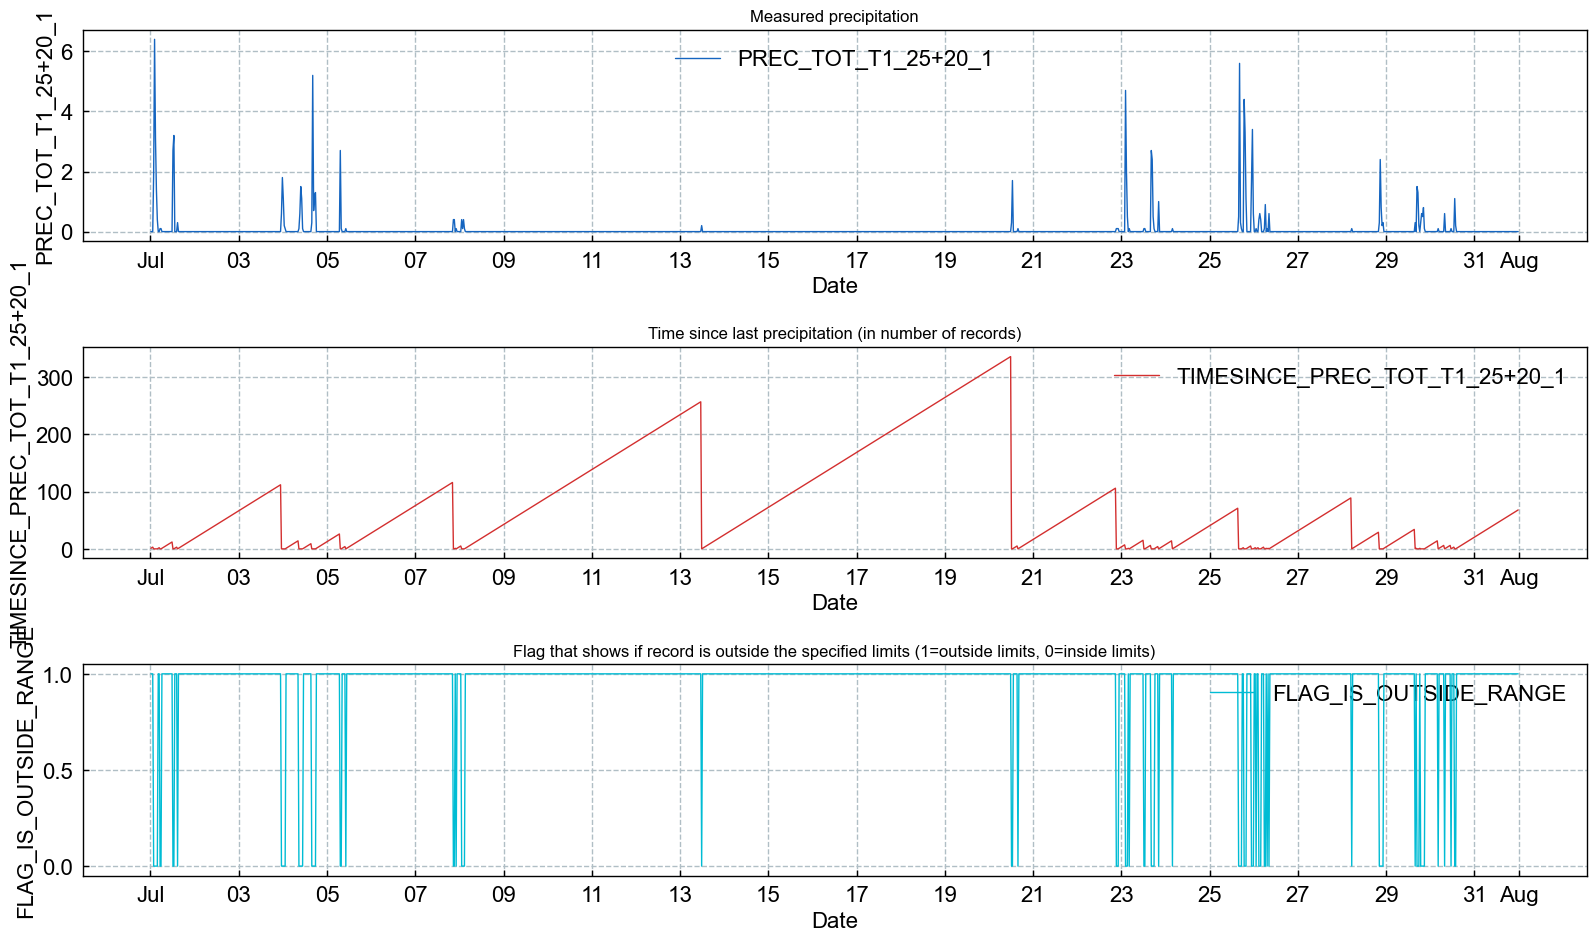

In [8]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(3, 1)  # rows, cols
gs.update(wspace=0.3, hspace=0.5, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
TimeSeries(ax=ax1, series=ts_full_results['PREC_TOT_T1_25+20_1']).plot(color='#1565C0')
TimeSeries(ax=ax2, series=ts_full_results['TIMESINCE_PREC_TOT_T1_25+20_1']).plot(color='#D32F2F')
TimeSeries(ax=ax3, series=ts_full_results['FLAG_IS_OUTSIDE_RANGE']).plot(color='#00BCD4')
ax1.set_title("Measured precipitation", color='black')
ax2.set_title("Time since last precipitation (in number of records)", color='black')
ax3.set_title("Flag that shows if record is outside the specified limits (1=outside limits, 0=inside limits)", color='black');

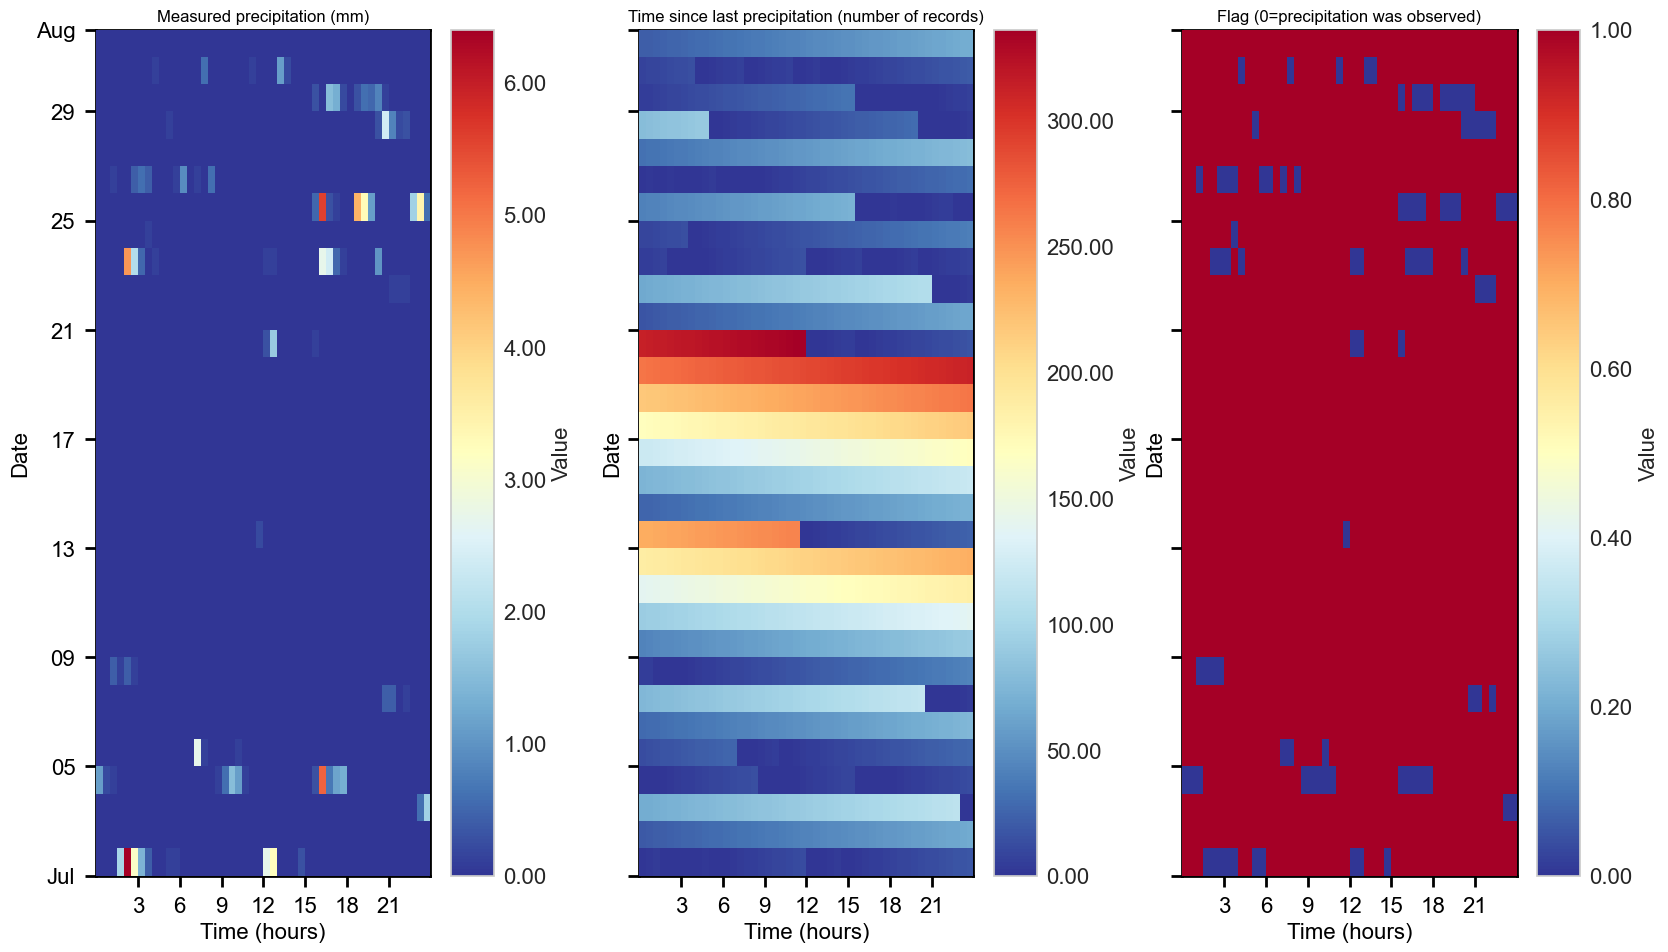

In [9]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.3, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax1, series=ts_full_results['PREC_TOT_T1_25+20_1']).plot()
HeatmapDateTime(ax=ax2, series=ts_full_results['TIMESINCE_PREC_TOT_T1_25+20_1']).plot()
HeatmapDateTime(ax=ax3, series=ts_full_results['FLAG_IS_OUTSIDE_RANGE']).plot()
ax1.set_title("Measured precipitation (mm)", color='black')
ax2.set_title("Time since last precipitation (number of records)", color='black')
ax3.set_title("Flag (0=precipitation was observed)", color='black')
ax2.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax3.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

</br>

# **End of notebook**

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-04-25 15:31:58
